In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import scipy.stats as stats

# Введение



**Проектная работа по принятию решений в бизнесе.**

---
**Описание исследования:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

---

**Цель исследования.**

Определить наиболее перспективную гипотезу, проанализировать результаты A/B теста и ответить на вопрос, влияет ли она на ключевые показатели.

---

**Задачи исследования.**

- Изучить каждый источник данных;
- Выполнить предобработку там если это необходимо;
- Приоритизировать гипотезы;
- Очистить данные;
- Провести анализ.

---

**Исходные данные.**

*Данные для первой части:* 

Файл ***

Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части:*  

Файл ***     

transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ. 

Файл ***    

date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

---

**План или содержание работы**

* Часть 1. Приоритизация гипотез.  

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

* Часть 2. Анализ A/B-теста

Проанализируйте A/B-тест:  
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.   
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.  
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.  
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.  
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  

## Часть. Приоритизация гипотез.
В файле (***) 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**   
Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

Загрузим файл и посмотрим на таблицу с данными:

In [2]:
pd.set_option('max_colwidth', 400)
hypothesis = pd.read_csv(***)
print(hypothesis.info())
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице 5 столбцов и 9 строк - гипотез с указанием параметров охвата, воздействия, уверенности и затраченных усилий на каждую.  

---
Описание данных:

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

---
Названия столбцов написаны с большой буквы - исправим это перед приоретизацией гипотез:

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Теперь приоритизируем гипотезы с помощью фреймворка `ICE` - создадим в таблице столбец с таким же названием и сохраним туда результат. Отсортируем таблицу по убыванию получившегося коэффициента:

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


На первом месте гипотеза с индексом **8**, далее расположились гипотезы с индексами **0** и **7**. На последних трёх местах гипотезы с индексами **5**, **3** и **4**. 

---
Теперь проведем приоритизацию с помощью фреймворка `RICE` и посмотрим, изменится ли результат.

In [5]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by="RICE", ascending = False) 

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


На этот раз с большим отрывом в рейтинге лидирует гипотеза с индексом **7**, которая была на третьем месте в предыдущем фреймворке.     
Лидирующая в фреймворке `ICE`гипотеза с индексом **8** переместилась с первого места на 5-ое.  
С пятого места на второе переместилась гипотеза с индексом **2**.  
Самой 'неудачной' гипотезой осталась гипотеза с индексом **4**. В целом 4 гипотезы с самым низким рейтингом( 5,3,1,4) остались в хвосте из всех предложенных.    
Объяснить перестановку мест можно включением в критерии оценки параметра охвата `reach`. У гипотез с индексом **7** и **8** он, соответственно, минимально и максимально возможен, что объясняет такую значительную перестановку в рейтинге.

### Вывод

* Столбцы датафрейма были приведены к нижнему регистру.
* При применении фреймворка `ICE` первые три места заняли гипотезы с индексами 8,0,7. Последние три(с конца) - 4,3,5.
* При применении фреймворка `RICE` первые три места заняли гипотезы с индексами 7,2,0. Последние три(с конца) - 1,5,4.
* Причина различия мест - параметр `reach` в фреймворке `RICE`

## Часть. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах `***` и `***`.
Проанализируем их.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Считаем датасеты и сохраним их в переменных `visitors` и `orders`. Выведем на экран первые 10 строк и общую информацию о таблице.

In [6]:
visitors = pd.read_csv(***)
print(visitors.info())
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Датафрейм содержит информацию о посетителях. В таблице 62 строки и  столбца.   
Названия столбцов указаны корректно, пропуски отсутствуют. 

---
Описание данных: 

`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

---
Столбец `date` приведём к формату даты и времени:

In [7]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Проверим, есть ли  в таблице дубликаты:

In [8]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено, можно двигаться дальше.

---

Повторим действия со второй таблицей:

In [9]:
orders = pd.read_csv(***)
print(orders.info())
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Датафрейм содержит информацию о покупках пользоватей. Данные представлены на 1197 строках и 5 столбцах.   
Как и в прошлой таблице, названия столбцов указаны корректно, пропуски отсутствуют. 

---
Описание данных:    

`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.

---
Столбец `date` также лучше привести к формату даты и времени:

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

Проверим, есть ли  в таблице дубликаты:

In [11]:
orders.duplicated().sum()

0

Также проверим, есть ли в данных пользователи, которвые входят одновременно в обе группы:

In [12]:
#Выводим таблица с 'двойными' покупателей:
display(orders.groupby('visitorId').agg({'group':'nunique'}).query('group >1').head())

#Считаем количество 'двойных' покупателей:
display(orders.groupby('visitorId').agg({'group':'nunique'}).query('group >1').shape)

#Считаем проценты 'двойных' покупателей относительно всех покупателей по выборке:
"{0:.1%}".format((len(orders.groupby('visitorId').agg({'group':'nunique'}).query('group >1')) / len(orders['visitorId'].unique())))

,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


(58, 1)

'5.6%'

58 покупателей оказались в обеих группах одновременно, это больше 5% от общей выборки. Видимо программа тестирования разделяет пользователей некорректно. Необходимо донести информацию до разработчиков и проверить результаты А/А тестов. 

---
Пользователей можно не удалять. Из-за их небольшого количества они врят ли смогут исказить результаты теста. 

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:  

`date` — дата;  
`group` — группа A/B-теста (A или B);  
`orders` — кумулятивное количество заказов на указанную дату в указанной группе;  
`buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;  
`revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);  
`visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.  

Соберём данные:

In [13]:
#отбираем пользователей группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# рассчитываем кумулятивное количество пользователей группы А для каждой даты
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#отбираем пользователей группы А
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# рассчитываем кумулятивное количество пользователей группы B для каждой даты
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#отбираем заказы группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# рассчитываем кумулятивную выручку группы А для каждой даты
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#отбираем заказы группы B

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# рассчитываем кумулятивную выручку группы B для каждой даты
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#соединяем всё в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь можно строить график кумулятивной выручки по группам:

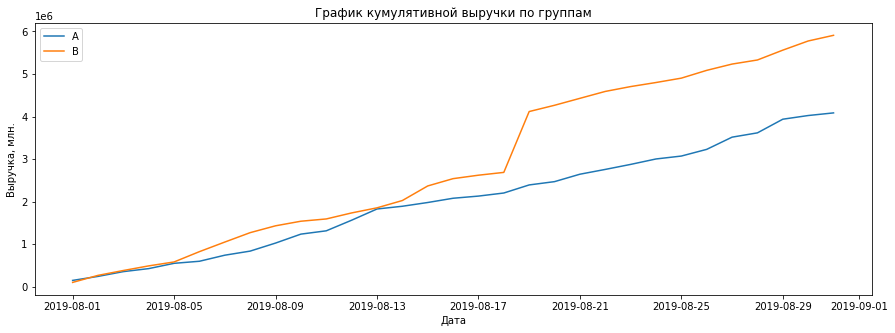

In [14]:
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн.')
plt.show()

- Выручка увеличивается в течении всего теста.    

- График показывает, что первые 5 дней выручка в группах почти не отличалась. Затем до 18 августа с небольшим преимуществом идёт группа **B**, 13 марта суммарная выручка в группах выровнялась.  

- 19 марта виден резкий всплеск в группе **B**, который вывел её в лидеры на всём оставшемся периоде. Видимо в этот день была совершена покупка на аномально крупную сумму, либо очень большое число заказов.       

- Надо отметить, что дальнейший рост по группам очень похожий и, если бы не резкий скачок, можно предположить продолжили бы идти вровень, либо с несущественным различием.

In [15]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### График кумулятивного среднего чека по группам

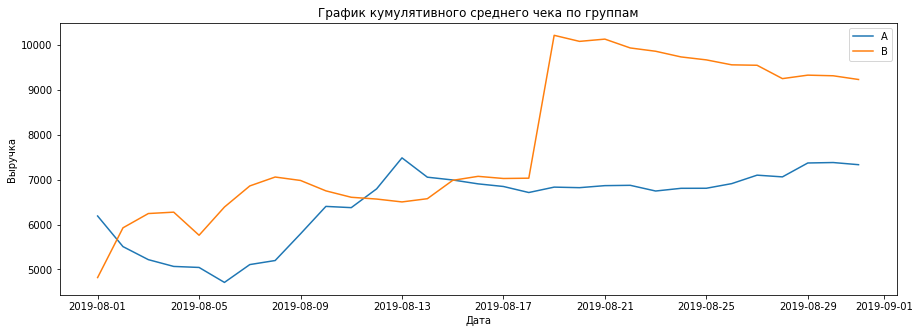

In [16]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

- В обеих группах характерны колебания в первые две недели теста.
- Начиная с середины теста средний чек в группе **А** практически установился возле реального среднего.  
- Значение в группе **B** хакатреризуется резким скачком 18 августа, как и на графике кумулятивной выручки. Вероятно в этот день был совершён один или несколько заказов на аномально большую сумму, что сильно сдвинуло среднее значение. 
- Начиная с 20 августа средний чек в группе **B** начинает падать - приходить к реальному среднему, но для этого ему нужно больше времени. 
- Из-за выброса выводы по этому графику делать рано - либо нужно продолжать проводить тест в ожидании выравнивания значений, либо 'чистить' данные от выбросов.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом `axhline()`:

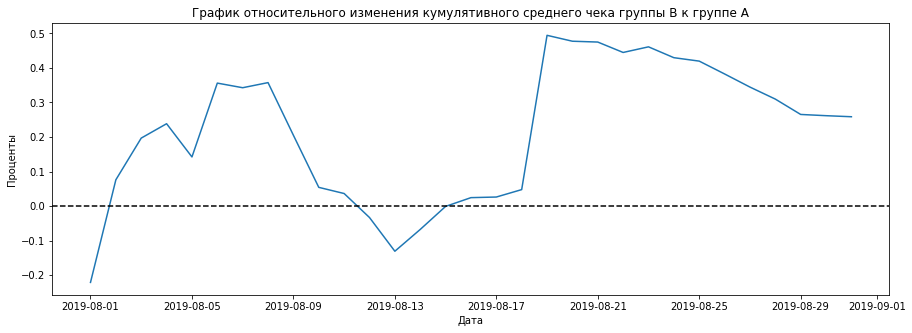

In [17]:
plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Проценты')
plt.show()

- На протяжении всего теста средний чек в группе **B** значительно выше, чем в группе **A**, кроме 13 августа где показатель проигрывает примерно на 13%.
- После резкого скачка 19 августа график идёт на спад, но ещё устоялся.
- В нескольких точках график различия между сегментами резко «скачет». В выборке явно присутствуют выбросы и аномалии.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Аналогично проанализируем график кумулятивной конверсии. Сперва добавим в таблицу столбец с параметром конверсии.  
Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — `["2019-04-01", '2019-04-23', 0.015, 0.04]`

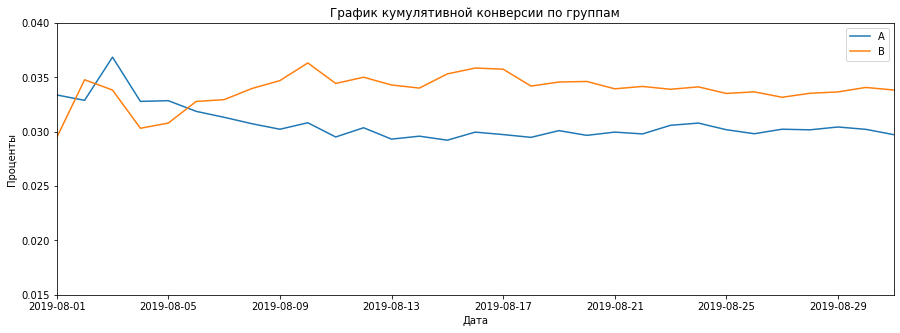

In [18]:
data['conversionCummulativeA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionCummulativeB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

plt.figure(figsize=(15,5))

# строим графики
plt.plot(data['date'], data['conversionCummulativeA'], label='A')
plt.plot(data['date'], data['conversionCummulativeB'], label='B')
plt.legend()
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), 0.015, 0.04]) 
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Проценты')
plt.show()

- Оба графика практически зафиксировались. 
- После 6 августа группа **B** вышла вперёд и стабильно показывает лучший результат на протяжении всего теста.

### График относительного изменения кумулятивной конверсии группы B к группе A

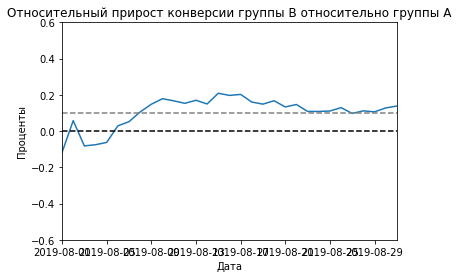

In [19]:
plt.plot(data['date'], data['conversionCummulativeB']/data['conversionCummulativeA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), -0.6, 0.6]) 
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Проценты')
plt.show()

- В начале теста конверсия групп колебалась вокруг одного значения, затем группа **B** вышла вперёд и достигла показателя более 20% относительно группы **А**, затем практически зафиксировалась возле показателя +10%, но в последние дни теста снова начала увеличиваться. 
- В целом можно утверждать, что конверсия группы **B** больше и вероятность того, что группа **А** покажет большие показатели крайне низкая.
* Необходимо очистить данные от выбросов и проверить, изменятся ли результаты.

### Строим точечный график количества заказов по пользователям. Сделайте выводы и предположения.

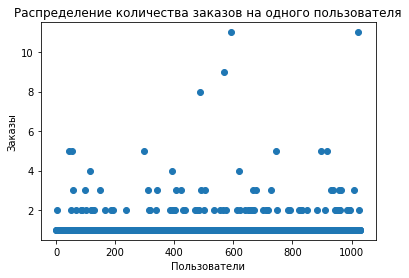

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение количества заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

График показывает наличие пользователей с более чем 10 заказами. Необходимо посмотреть на количество таких пользователей с множеством заказов относительно общей выборки:

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Применим функцию `np.percentile`

In [21]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Только 5% от выборки сделала более 2-ух заказов и только 1% более 4-х. Определим верхнюю границу заказов на пользователя как 4 включительно и будем считать большее количество за выбросы.

---
Повторим процедуру со средним чеком:

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

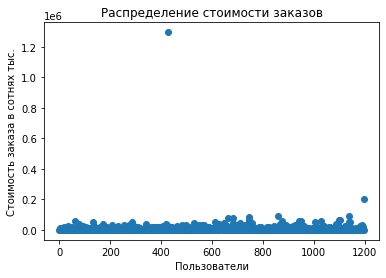

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа в сотнях тыс.')
plt.show()

В выборке есть заказы стоимостью более 1,2 млн! Разумеется такой заказ резко изменит значение среднего чека в группе, в которую он попадёт. В целом по графику есть таких высоких значений не видно, кроме одного - немного превыщающем 200 000. Посмотрим на количество таких заказов относительно общей выборки:

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только 5% заказов превышают сумму 28 000 и только один процент совершён на сумму больше 58233 рубля. Возьмём за верхнюю границу 'нормальноси' суммы заказа сумму 40 000, а заказы превышующие это значение будем считать выбросами.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для начала сформулируем нулевую и альтернативную гипотезы. 
* Нулевая гипотеза - конверсия в двух группах равна. 
* Альтернативная гипотеза - конверсия в двух группах различается.

Применим тест Манна-Уитни к двум группам.
Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Переменная sampleA должна состоять из двух частей:
Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']`.
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])`. Создадим объект `pd.Series` нужной длины:

In [25]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.   
Так же выведем разницу в конверсии между группой **B** и группой **A** в процентах и округлим до одного знака после запятой:

In [26]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

"{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1)

0.017


'13.8%'

* Пользователи гуруппы **B** совершают в среднем на 13,8% заказов, чем в группе **А**.  
* Разница в количестве заказов на пользователя является статичтически значимой - p-value меньше 0.05.

---
Посмотрим на различия в среднем чеке

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Применим критерий Манна-Уитни к выручке групп **А** и **B**, а так же выведем разницу в конверсии между группой B и группой A в процентах и округлим до одного знака после запятой:

In [27]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
"{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

0.729


'25.9%'

* По неочищенным данным средний чек в группе **B** больше почти на 26%, но при этом p-value очень далеко от статистически значимого. Это можно объяснить наличием сильный выбросов в группе и тем, что тест Манна-Уитни устойчив к ним.

Необходимо повторить тесты на очищенных данных.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Напомним, что найденные в ранее 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4  заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 40 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 40 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.
Узнаем, сколько всего аномальных пользователей методом `shape()`.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape)
abnormalUsers.head(5)

(34,)


1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64

Всего 34 аномальных пользователя.   
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
16.4%


* После удаления выбросов различие в количестве заказов на пользователя стало ещё более явным:   
- p-value уменьшилось ещё на 0.008 и стало меньше 0.01, что говорит о сильной статистической значимости.
- разница в количестве заказов на пользователя в группе **B** по отношению к группе **A** увеличилось ещё на 2.6% и теперь составляет 16.4%. 

--- 
Посмотрим на различия в среднем чеке на "очищенных" данных

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [31]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.711
0.060


* После удаления выбросов p-value осталось очень высоким, а разница в средних чеках уменьшилась почти на 20% и теперь составляет 6%.
* Можно констатировать отсутствие статистической значимости между выборками по заданному параметру.

### Примите решение по результатам теста и объясните его.

Построим заного графики относительного различия конверсий и среднего чека по очищенным данным.  
Вначале уберём из заказов 'аномальных' пользователей:

In [32]:
orders_filtered = orders.query('not visitorId in @abnormalUsers')

Затем 'пересоберём' данные:

In [33]:
ordersADaily = (
    orders_filtered[orders_filtered['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_filtered[orders_filtered['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_filtered = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

И построим графики:

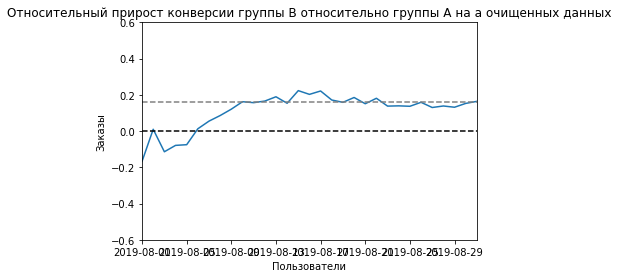

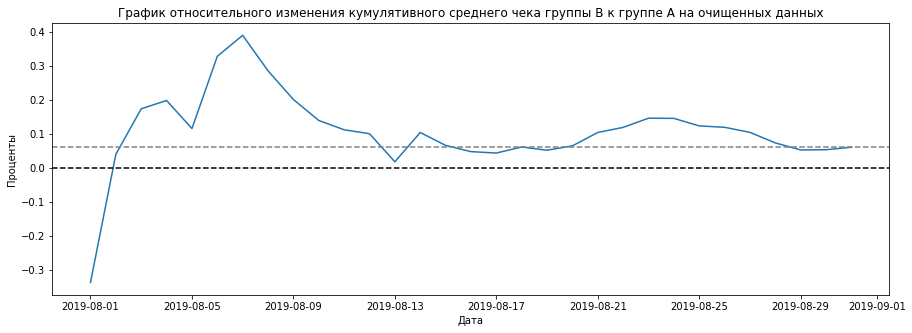

In [34]:
data_filtered['conversionCummulativeA'] = data_filtered['ordersCummulativeA']/data_filtered['visitorsCummulativeA']
data_filtered['conversionCummulativeB'] = data_filtered['ordersCummulativeB']/data_filtered['visitorsCummulativeB']

plt.plot(data_filtered['date'], data_filtered['conversionCummulativeB']/data_filtered['conversionCummulativeA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), -0.6, 0.6]) 
plt.title("Относительный прирост конверсии группы B относительно группы A на а очищенных данных")
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(data_filtered['date'], (data_filtered['revenueCummulativeB']/data_filtered['ordersCummulativeB'])/(data_filtered['revenueCummulativeA']/data_filtered['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.06, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A на очищенных данных')
plt.xlabel('Дата')
plt.ylabel('Проценты')
plt.show()


* Оба графика устоялись, принимаем решение останавливать тест.
* Можно зафиксировать победу группы **B** в показателе количества заказов на одного покупателя.
* Можно зафиксировать отсутствие различий в среднем чеке между исслудуемыми группами.

---
Совокупность итогов можно интерпретировать следующим образом - количество заказов в группе **B** увеличилось, но стоимость заказа снизилась, поэтому средний чек остался неизменным. 


### Вывод

---

* Во время предобработки данных названия столбцов таблицы `hypothesis` были приведены к нижнему регистру.


- Столбцы с датами в таблицах с покупателями и заказами были приведены к формату даты и времени.


- Были выявлены пользователи, совершившие заказы в обоих группах теста. Необходимо передать информацию отделу разработки на предмет проверки механизма распределения в тесте.  


* Самой перспективной была признана гипотеза: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**. Методом приоритизации был выбран фреймворк RICE.


* В ходе исследовательского анализа были определены границы 'нормального' количества заказов на покупателя и стоимости заказа: 4 заказа и 40 000.  


* Группа **B** в тесте показала статистически значимые различия в количестве заказов на покупателя как на исходных, так и на 'очищенных' данных.


* Тест показал отсутствие статистически значимых различий в среднем чеке между группами на исходных, так и на 'очищенных' данных.


* Совокупность итогов можно интерпретировать следующим образом - количество заказов в группе **B** увеличилось, но стоимость заказа снизилась, поэтому средний чек остался неизменным. 


* Графики относительных различий групп устоялись - это даёт основание завершить тест и признать победу группы **B** в количестве заказов и отсутствие различий в среднем чеке между группами.
---
Исследование можно считать завершённым. 